Name: Shahnwaz Khan
Roll: AC-1272
Subject: Data Mining
Semester: VI
Practical: Q5

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Import Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# For K Nearest
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# metrics to calculate the accuracy of classifiers
from sklearn import metrics
# seaborn to load the iris data set
import seaborn as sns

In [2]:
df=sns.load_dataset('iris')
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Choosing Training set using HOLD OUT method

In [3]:
# store the feature matrix (X) and response vector (y)
X = df.drop(columns='species')
y = df['species']
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Naive Bayes Classifier

In [4]:
# Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [5]:
Naive_Accuracy= metrics.accuracy_score(y_test, y_pred)*100

KNN

In [6]:
# Create an instance of KNN class. Neighbors size=5 and p=2 means use Euclidean distance 
classifier=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# Train our data by fitting the data into our model
classifier.fit(X_train,y_train)
# Now predict the output
y_pred=classifier.predict(X_test)

In [7]:
KNN_Accuracy= metrics.accuracy_score(y_test, y_pred)*100

Decision Tree

In [8]:
# Creating instance of Decision Tree Classifier
DC=DecisionTreeClassifier()
# Fit the model
DC.fit(X_train,y_train)
# Predict the result
y_pred=DC.predict(X_test)

In [9]:
Decision_Accuracy= metrics.accuracy_score(y_test, y_pred)*100

In [10]:
print('Naive Bayes Accuracy: ',Naive_Accuracy)
print('KNN accuracy: ',KNN_Accuracy)
print('Decision Tree Accuracy: ',Decision_Accuracy)

Naive Bayes Accuracy:  86.66666666666667
KNN accuracy:  86.66666666666667
Decision Tree Accuracy:  93.33333333333333


Comparing Different Classifiers using Bar Plot

In [11]:
df=pd.DataFrame([[Naive_Accuracy,KNN_Accuracy,Decision_Accuracy]],columns=['Naive','KNN','Decision'],index=['classifier'])
df

,Naive,KNN,Decision
classifier,86.666667,86.666667,93.333333


<AxesSubplot:>

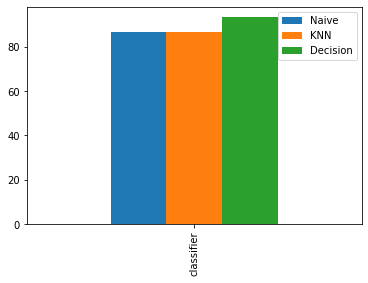

In [12]:
df.plot.bar()

(ii) Choose Training set using Random Sub Sampling method

Random subsampling

In [13]:
k=3  # Count of random selection of samples
Decision_Accuracy=0  # Accuracy of decision tree
KNN_Accuracy=0 # Accuracy of KNN
Naive_Accuracy=0 # Accuracy of Naive Bayes  
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
# Fit the decision tree model
    DC.fit(X_train,y_train)
    # Fit KNN Model
    classifier.fit(X_train,y_train)
    # Fit Naive Bayes Model
    gnb.fit(X_train,y_train)
# Predict the result using each classifier
    y_pred_dc=DC.predict(X_test)
    y_pred_knn=classifier.predict(X_test)
    y_pred_naive=gnb.predict(X_test)

    # Now find the accuracy of each classifier 
    #Decision tree
    acc_temp_DC= metrics.accuracy_score(y_test, y_pred_dc)*100
    Decision_Accuracy+=acc_temp_DC/k

    # KNN
    acc_temp_KNN= metrics.accuracy_score(y_test, y_pred_knn)*100
    KNN_Accuracy+=acc_temp_KNN/k

    # Naive Bayes
    acc_temp_Naive= metrics.accuracy_score(y_test, y_pred_naive)*100
    Naive_Accuracy+=acc_temp_Naive/k

print('Naive Bayes Accuracy: ',Naive_Accuracy)
print('KNN accuracy: ',KNN_Accuracy)
print('Decision Tree Accuracy: ',Decision_Accuracy)

Naive Bayes Accuracy:  94.44444444444446
KNN accuracy:  96.66666666666666
Decision Tree Accuracy:  93.33333333333334


Compare different classifier using Bar Plot

In [14]:
df=pd.DataFrame([[Naive_Accuracy,KNN_Accuracy,Decision_Accuracy]],columns=['Naive','KNN','Decision'],index=['classifier'])
df

,Naive,KNN,Decision
classifier,94.444444,96.666667,93.333333


<AxesSubplot:>

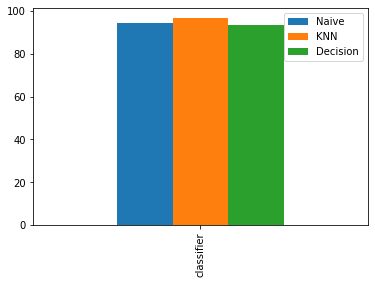

In [15]:
df.plot.bar()

5.3 Data is scaled to standard format.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
object= StandardScaler()
# standardization 
scale = object.fit_transform(X_train) 
print(scale)

[[ 0.38000826 -0.54284038  0.20249287  0.22420504]
 [ 0.25840562 -0.31102242  0.48636138  0.49460307]
 [-0.22800496 -1.23829425  0.14571917 -0.046193  ]
 [ 2.32565056  1.77533918  1.73538283  1.44099619]
 [ 0.38000826 -0.07920447  0.54313508  0.35940405]
 [ 0.74481619 -0.31102242  0.37281398  0.22420504]
 [-0.95762082  0.84806735 -1.21684968 -1.26298415]
 [ 0.25840562 -0.77465834  0.8270036   0.62980209]
 [ 0.62321355 -1.23829425  0.77022989  1.03539914]
 [ 0.62321355 -0.31102242  1.11087211  0.90020012]
 [-0.10640231 -0.07920447  0.31604028  0.08900602]
 [ 2.32565056 -0.07920447  1.39474062  1.5761952 ]
 [-0.83601817  1.07988531 -1.27362339 -1.26298415]
 [ 0.74481619  0.15261349  1.0540984   0.90020012]
 [-0.59281289  1.54352122 -1.21684968 -1.26298415]
 [ 0.38000826 -0.54284038  0.59990879  0.08900602]
 [ 0.25840562 -0.07920447  0.65668249  0.90020012]
 [ 0.98802148 -0.31102242  0.54313508  0.22420504]
 [-1.44403139  0.15261349 -1.21684968 -1.26298415]
 [ 0.62321355 -0.54284038  0.82